# Shallow NN

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
import sklearn.datasets
from sklearn.metrics import accuracy_score

#np.random.seed(42) 

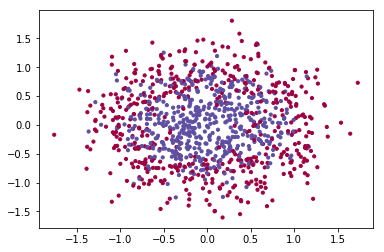

In [21]:
X,Y = sklearn.datasets.make_circles(n_samples=1000, factor=.5, noise=.3)
#X, Y = sklearn.datasets.make_moons(n_samples=1000, noise=.2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
Y_train, Y_test = Y_train.reshape(Y_train.shape[0],1), Y_test.reshape(Y_test.shape[0],1)
X, Y = X.T, Y.reshape(1, Y.shape[0])
X_train, Y_train = X_train.T, Y_train.reshape(1, Y_train.shape[0])
X_test, Y_test = X_test.T, Y_test.reshape(1, Y_test.shape[0])
plt.scatter(X[0, :], X[1, :], c=Y[0], s=10, cmap=plt.cm.Spectral)

In [4]:
def layer_sizes(X, Y):
   
    n_x = X.shape[0] 
    n_h = 4
    n_y = Y.shape[0] 
    return (n_x, n_h, n_y)


def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) 
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

def forward_propagation(X, parameters):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

def compute_cost(A2, Y, parameters):
    m = Y.shape[1] 
    W1 = parameters['W1']
    W2 = parameters['W2']
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)          
    return cost

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    return parameters

def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)    
    return predictions

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [22]:
p = nn_model(X_train, Y_train, 5)

In [23]:
preds = predict(p, X_test)

In [24]:
accuracy_score(preds.reshape(-1), Y_test.reshape(-1))

0.5303030303030303